1. Data Loading

In [62]:
import pandas as pd
import numpy as np

train = pd.read_csv("Train_Loan_Home.csv")
test = pd.read_csv("Test_Loan_Home.csv")

1.1 Combining the test and train datasets for further exploration and analysis

In [63]:
train['Source'] = 'train'
test['Source'] = 'test'
data = pd.concat([train, test], ignore_index=True, sort=True)

2. Data Exploration

2.1 General Overview

In [64]:
print (test.shape, train.shape, data.shape)

(367, 13) (614, 14) (981, 14)


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
Source               981 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


In [66]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Source
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train


In [67]:
data.tail()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Source
976,4009,1777.0,1.0,3+,Not Graduate,Male,113.0,360.0,LP002971,NaN,Yes,Urban,Yes,test
977,4158,709.0,1.0,0,Graduate,Male,115.0,360.0,LP002975,NaN,Yes,Urban,No,test
978,3250,1993.0,NaN,0,Graduate,Male,126.0,360.0,LP002980,NaN,No,Semiurban,No,test
979,5000,2393.0,1.0,0,Graduate,Male,158.0,360.0,LP002986,NaN,Yes,Rural,No,test
980,9200,0.0,1.0,0,Graduate,Male,98.0,180.0,LP002989,NaN,No,Rural,Yes,test


In [68]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


2.2 Corralation between variables.

Nothing significant was found, except some corralation between Loan Amount and Appliccant Income.

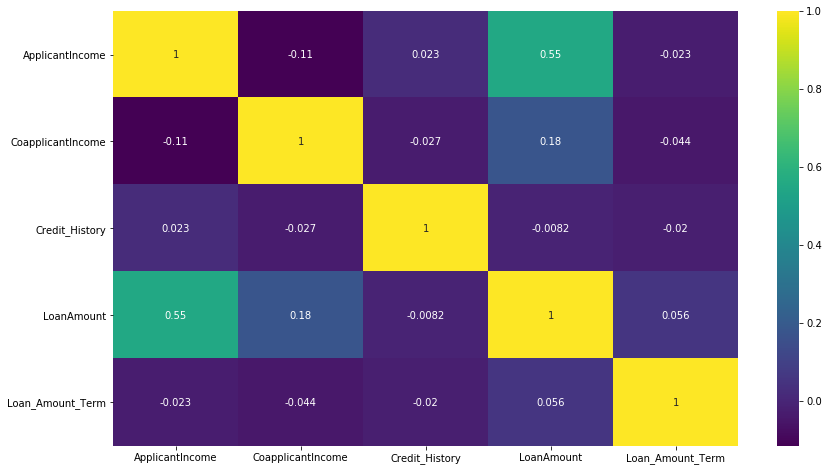

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

2.3 Applicant and Coapplicalnt Total Income vs Loan Amount.

Higher incomes does not necesseraly lead to a higher loan amount.

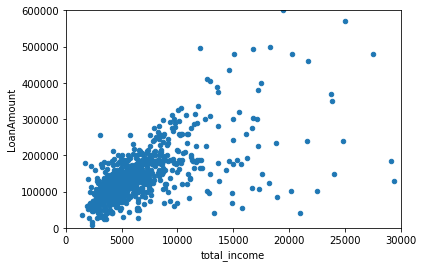

In [70]:
data['total_income'] = data.ApplicantIncome + data.CoapplicantIncome

temp = pd.concat([data['total_income'], data['LoanAmount']*1000], axis=1)
temp.plot.scatter(x='total_income', y='LoanAmount', ylim=(0,600000), xlim=(0,30000))

2.4 Is there any preference in choosing of Property Area between Self Employed and not Self Employed.

The answear is NO.

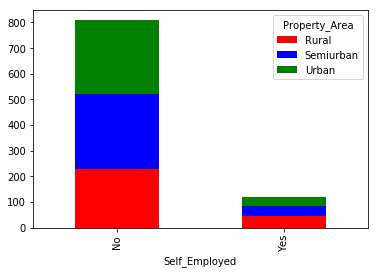

In [71]:
temp = pd.crosstab(data.Self_Employed, data.Property_Area)
temp.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], grid=False)

2.5 How credit History affects loan approval.

As expected, one must have positive credit history in order to get a loan(blue).
The number of rejected applications are the same with or without positive credit history.
Number 2 represents the missing values in Loan_Status variable from the Test dataset.

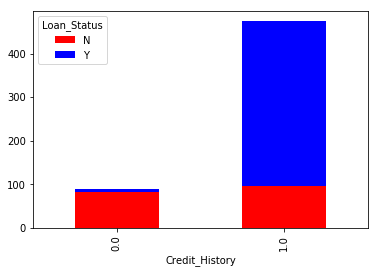

In [72]:
temp = pd.crosstab(data.Credit_History, data.Loan_Status)
temp.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], grid=False)

2.6 Credit history and Loan status grouped by Gender.

The cases where the credit history was positive, and the loan was approved are dominated by male applicants.
Number 2 represents the missing values in Loan_Status variable from the Test dataset (Should be ignored).

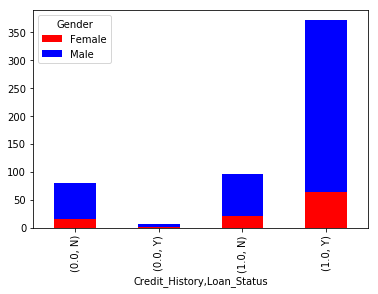

In [73]:
temp = pd.crosstab([data.Credit_History, data.Loan_Status], data.Gender)
temp.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

2.7 Does the Property_Area affects loan approval.

Properties in area number 2 area (Semiurban) get more approvals than area 1 and 3 (Urban and Rural). 

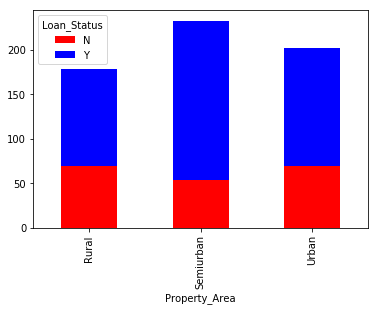

In [74]:
temp = pd.crosstab(data.Property_Area, data.Loan_Status)
temp.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], grid=False)

2.8 Log of LoanAmount

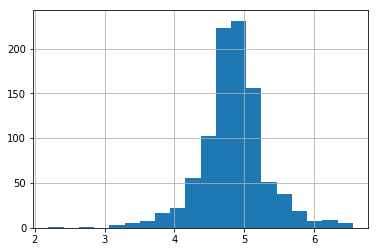

In [75]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

2.9 Applicant Income

Based on the boxplot and describe function below, we can come to a conclusion that the average income ($5214) is highly affected by the higher incomes. Therefore, the incomes should be divided into several categories and decision making should be for each range separately.

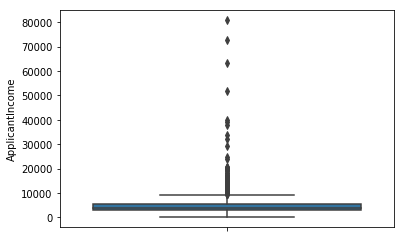

In [76]:
sns.boxplot(data.ApplicantIncome, orient='v',)

2.10 Loan Amount.

The mean of the loan amount is represented incorrectly, segmentation should be applied.

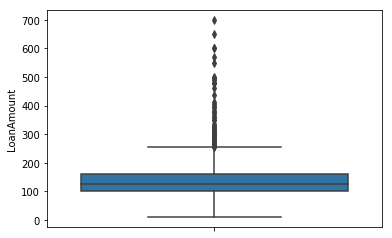

In [77]:
sns.boxplot(data.LoanAmount, orient='v',)

2.11 Exploration of categorical variables and their frequency

In [78]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID','source']]

for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print(data[col].value_counts())


Frequency of Categories for variable Dependents
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64

Frequency of Categories for variable Gender
Male      775
Female    182
Name: Gender, dtype: int64

Frequency of Categories for variable Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64

Frequency of Categories for variable Married
Yes    631
No     347
Name: Married, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

Frequency of Categories for variable Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Source
train    614
test     367
Name: Source, dtype: int64


2.12 Exploration of unique values (Missing value is considered as a unique value)

In [79]:
data.apply(lambda x: len(x.unique()))

ApplicantIncome      752
CoapplicantIncome    437
Credit_History         3
Dependents             5
Education              2
Gender                 3
LoanAmount           233
Loan_Amount_Term      13
Loan_ID              981
Loan_Status            3
Married                3
Property_Area          3
Self_Employed          3
Source                 2
total_income         848
LoanAmount_log       233
dtype: int64

3. Missing Values

3.1 General Overview

In [80]:
train.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Source                0
dtype: int64

In [81]:
test.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Source                0
dtype: int64

In [82]:
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
Source                 0
total_income           0
LoanAmount_log        27
dtype: int64

3.2 Treatment of missing values

3.2.1 In cases where a loan was approved (Loan_Status==Y) but Credit_History is missing, the missing value will be replced by 1, meaning that if a client was approved then he/she must have had a good credit history.

In cases where a loan was not approved and Credit_History is missing the missing value will be replaced by 0.0

As a result, out 79 missing values 29 remained, which belong to the test.csv file, these values will be romoved since there is no point in trying to predict Loan_Status without Credit History since it is the most importanat factor in loan approval process.

In [83]:
data.loc[(data['Loan_Status'] == 'Y') & (data['Credit_History'].isnull()), 'Credit_History'] = 1.0
data.loc[(data['Loan_Status'] == 'N') & (data['Credit_History'].isnull()), 'Credit_History'] = 0.0
data.dropna(subset = ['Credit_History'], inplace=True)
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents            23
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      19
Loan_ID                0
Loan_Status          338
Married                3
Property_Area          0
Self_Employed         54
Source                 0
total_income           0
LoanAmount_log        27
dtype: int64

3.2.2 LoanAmount and LoanAmount_log: 27 missing values replaced with the average

In [84]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['LoanAmount_log'].fillna(data['LoanAmount_log'].mean(), inplace=True)
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents            23
Education              0
Gender                24
LoanAmount             0
Loan_Amount_Term      19
Loan_ID                0
Loan_Status          338
Married                3
Property_Area          0
Self_Employed         54
Source                 0
total_income           0
LoanAmount_log         0
dtype: int64

3.2.3 Missing values in Loan_Amount_Term, Dependents, Gender, Married, and Self_Employed variables will be replaced by mode of each variable.

338 missing values in Loan_Status variable belong to the test.csv file, no treatment is needed at this point.

In [85]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          338
Married                0
Property_Area          0
Self_Employed          0
Source                 0
total_income           0
LoanAmount_log         0
dtype: int64

3.2.4 Final dataset (981 - 952 = 29 rows were removed from the test file)

In [86]:
data.shape

(952, 16)

Back to Exploration

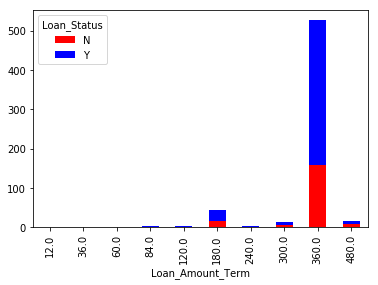

In [87]:
temp = pd.crosstab(data.Loan_Amount_Term, data.Loan_Status)
temp.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], grid=False)

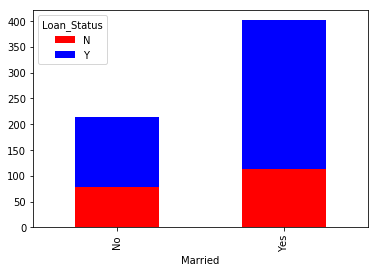

In [88]:
temp = pd.crosstab(data.Married, data.Loan_Status)
temp.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], grid=False)

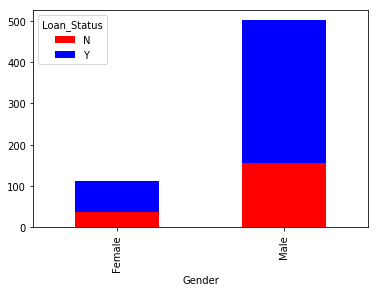

In [89]:
temp = pd.crosstab(data.Gender, data.Loan_Status)
temp.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], grid=False)

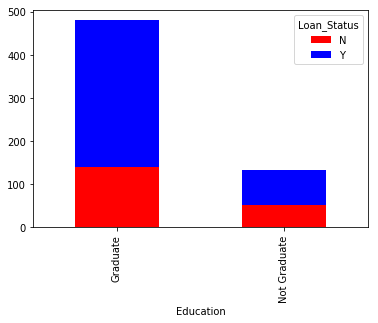

In [90]:
temp = pd.crosstab(data.Education, data.Loan_Status)
temp.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], grid=False)

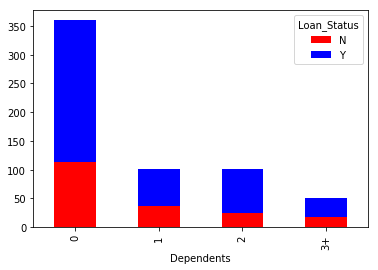

In [91]:
temp = pd.crosstab(data.Dependents, data.Loan_Status)
temp.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], grid=False)

4. Feature Engineering

4.1 No need for Loan_ID variable in this analysis

In [92]:
data.drop(['Loan_ID'], axis=1, inplace=True)

4.2 Treatment of categorical variables (Based on exploration of categorical values, section 2.11)

In [93]:
cleanup_nums = {"Education":     {"Graduate": 1, "Not Graduate": 0},
                "Gender":        {"Male": 1, "Female": 0},
                "Loan_Status":   {"Y": 1, "N": 0},
                "Married":       {"Yes": 1, "No": 0},
                "Property_Area": {"Urban": 1, "Semiurban": 2, "Rural": 3},
                "Self_Employed": {"Yes": 1, "No": 0},
                "Dependents": {"0": 0, "1": 1, "2": 2, "3+": 3}
               }
data.replace(cleanup_nums, inplace=True)

4.3 New Variable: Monthly payments, without interest.

In [94]:
data['min_payment'] = ((data.LoanAmount *1000) / (data.Loan_Amount_Term))

4.4 New Variable: Percent of income that will be spent on the loan.

In [95]:
data['percent_of_income'] = (data.min_payment / data.total_income) * 100

4.5 Dummies for Property_Area and Dependents variables

In [96]:
clean_data = pd.get_dummies(data=data, columns=['Dependents', 'Property_Area'])

In [97]:
clean_data.shape

(952, 22)

4.6 Spliting back into clean_train and clean_test files

In [98]:
clean_train = clean_data.loc[(data['Source'] == 'train')].copy()
clean_train.drop(['Source'], axis=1, inplace=True)
clean_train.shape

(614, 21)

In [99]:
clean_test = clean_data.loc[(data['Source'] == 'test')].copy()
clean_test.drop(['Source'], axis=1, inplace=True)
clean_test.drop(['Loan_Status'],axis=1, inplace=True)
clean_test.shape

(338, 20)

4.7 Moving the Loan_Status variable to the end of the data frame

In [100]:
clean_train = clean_train.reindex(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Education',
       'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Married', 'Self_Employed', 'LoanAmount_log',
       'total_income', 'min_payment', 'percent_of_income', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Property_Area_1', 'Property_Area_2', 'Property_Area_3', 'Loan_Status'], axis=1)

5.Back to data Exploration

5.1 New correlation analysis

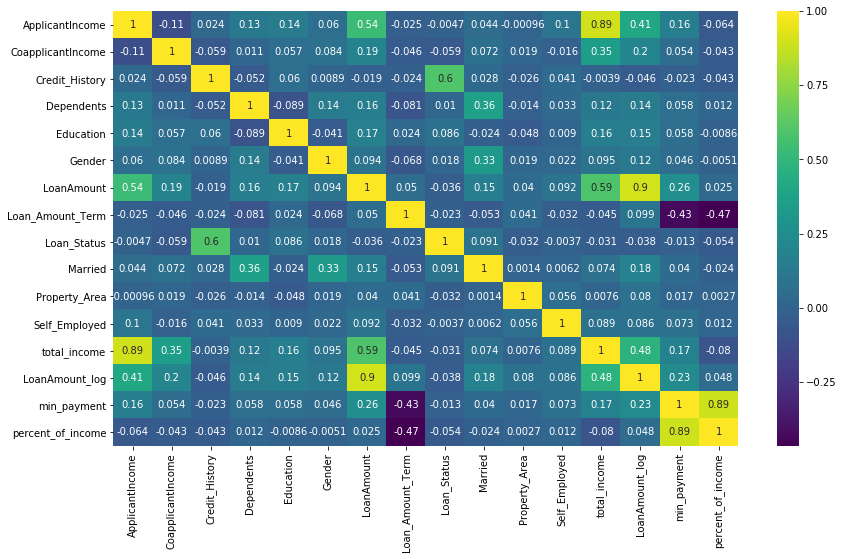

In [101]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

5.2 Loan Amount Distribution

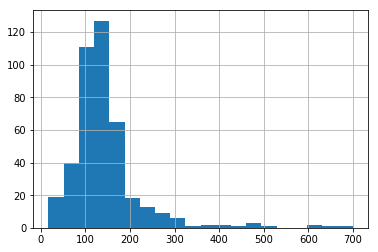

In [102]:
temp = data.loc[data['Loan_Status'] == 1.0]
temp['LoanAmount'].hist(bins=20)

5.3 Minimal pmonthly payment (without interest)

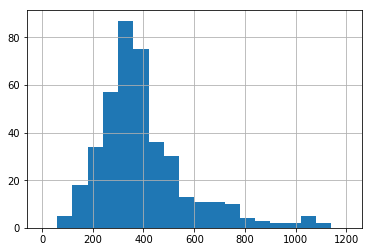

In [103]:
temp = data.loc[data['Loan_Status'] == 1.0]
temp['min_payment'].hist(bins=20, range=[0,1200])

5.4 Minimal Percent of income that will be spent on the loan

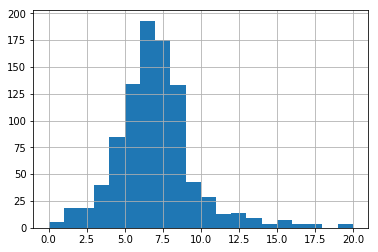

In [104]:
temp = data.loc[data['Loan_Status'] == 1.0]
data['percent_of_income'].hist(bins=20, range=[0,20])

6. Prediction of Loan_Status

6.1 Spliting of the dataset into train and test data sets

In [105]:
x = clean_train.iloc[:,0:20]
y = clean_train.iloc[:,20]

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

5.2 Scaling of the data

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


5.3 Additional variables

In [108]:
score = []
crossvalscore = []
gridsearchscore =[]
k = 5

5.2 Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression() 
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)
score.append(round(accuracy_score(y_test, y_pred),3)*100)


crossvalscores = cross_val_score(logreg, x, y, cv=k)
crossvalscore.append(round(crossvalscores.mean(),3)*100)

parameters = {'C': [0.01,0.1,1],
              'penalty':['l1','l2'],
              'max_iter': [5, 10, 15, 20, 25, 50]
             }

GS = GridSearchCV(logreg, parameters,cv=k)
GS.fit(X_train,y_train)
gridsearchscore.append(round(GS.best_score_, 4)*100)

print(confusion_matrix(y_test, y_pred))
print(score)
print(crossvalscore)
print(gridsearchscore)

[[ 25  18]
 [  3 108]]
[86.4]
[83.6]
[82.39]


5.2.1 ROC Curve

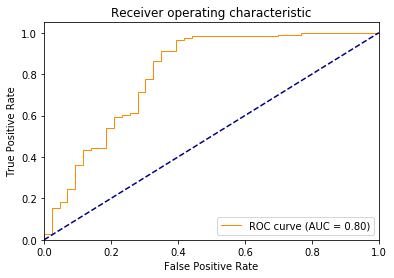

In [121]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

5.3 K Nearest Neighbors - KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

score.append(round(accuracy_score(y_test, y_pred),4)*100)

crossvalscores = cross_val_score(KNN, x, y, cv=k)
crossvalscore.append(round(crossvalscores.mean(),3)*100)

parameters = {'n_neighbors':[25,30,35],
              'weights':['uniform','distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree']
             }
GS = GridSearchCV(KNN, parameters,cv=k)
GS.fit(X_train,y_train)
gridsearchscore.append(round(GS.best_score_, 4)*100)

print(confusion_matrix(y_test, y_pred))
print(score)
print(crossvalscore)
print(gridsearchscore)

[[21 22]
 [12 99]]
[86.4, 77.92]
[83.6, 62.5]
[82.39, 77.39]


5.4 Random Forest - RM

In [112]:
from sklearn.ensemble import RandomForestClassifier

RM = RandomForestClassifier()
RM.fit(X_train, y_train)
y_pred = RM.predict(X_test)

score.append(round(accuracy_score(y_test, y_pred),3)*100)

crossvalscores = cross_val_score(RM, x, y, cv=k)
crossvalscore.append(round(crossvalscores.mean(),3)*100)

parameters = {'n_estimators':[50,60,70],
              'criterion':['gini', 'entropy'],
              'max_depth':[3,4,5],
             }

GS = GridSearchCV(RM, parameters,cv=k)
GS.fit(X_train,y_train)
gridsearchscore.append(round(GS.best_score_, 4)*100)


print(confusion_matrix(y_test, y_pred))
print(score)
print(crossvalscore)
print(gridsearchscore)

[[31 12]
 [21 90]]
[86.4, 77.92, 78.60000000000001]
[83.6, 62.5, 77.4]
[82.39, 77.39, 82.83]


5.5 Support Vector Classification - SVC

In [113]:
from sklearn.svm import SVC

SVCX = SVC()
SVCX.fit(X_train, y_train)
y_pred = SVCX.predict(X_test)

score.append(round(accuracy_score(y_test, y_pred),3)*100)

crossvalscores = cross_val_score(SVCX, x, y, cv=k)
crossvalscore.append(round(crossvalscores.mean(),3)*100)

parameters = {'C':[0.01,0.1,1],
              'kernel':['poly', 'linear'],
              'decision_function_shape':['ovr', 'ovo']
              }

GS = GridSearchCV(SVCX, parameters,cv=k)
GS.fit(X_train,y_train)
gridsearchscore.append(round(GS.best_score_, 4)*100)

print(confusion_matrix(y_test, y_pred))
print(score)
print(crossvalscore)
print(gridsearchscore)

[[ 23  20]
 [  2 109]]
[86.4, 77.92, 78.60000000000001, 85.7]
[83.6, 62.5, 77.4, 69.1]
[82.39, 77.39, 82.83, 82.39]


5.6 DecisionTreeClassifier - DTC

In [114]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(max_depth = 5)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

score.append(round(accuracy_score(y_test, y_pred),3)*100)

crossvalscores = cross_val_score(DTC, x, y, cv=k)
crossvalscore.append(round(crossvalscores.mean(),2)*100)

parameters = {'max_depth':[1, 3, 5, 7],
              'min_samples_split':[2, 3, 4, 5],
              'min_impurity_decrease':[0, 1, 2, 3]
              }

GS = GridSearchCV(DTC, parameters,cv=k)
GS.fit(X_train,y_train)
gridsearchscore.append(round(GS.best_score_, 4)*100)

print(confusion_matrix(y_test, y_pred))
print(score)
print(crossvalscore)
print(gridsearchscore)

[[ 23  20]
 [  5 106]]
[86.4, 77.92, 78.60000000000001, 85.7, 83.8]
[83.6, 62.5, 77.4, 69.1, 81.0]
[82.39, 77.39, 82.83, 82.39, 82.39]


6. Results

6.1 Visualization of Classification Performance

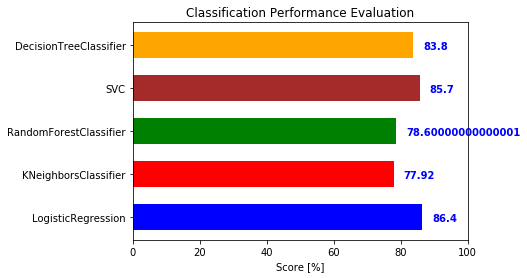

In [115]:
x = ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'SVC', 'DecisionTreeClassifier']
y = score

fig, ax = plt.subplots()    
width = 0.6 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=["blue", "red", "green", "brown", "orange"])
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
plt.title('Classification Performance Evaluation')
plt.xlabel('Score [%]')
plt.xlim(0, 100)

for i, v in enumerate(y):
    ax.text(v + 3, i-0.1, str(v), color='blue', fontweight='bold')

plt.show()

6.2 K Fold Cross Validation Performance

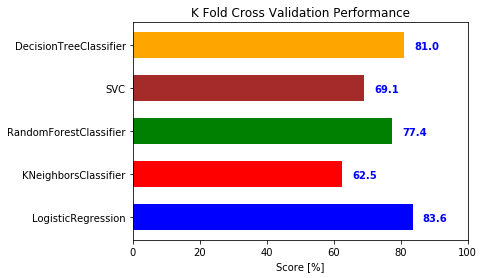

In [116]:
x = ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'SVC', 'DecisionTreeClassifier']
y = crossvalscore

fig, ax = plt.subplots()    
width = 0.6 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=["blue", "red", "green", "brown", "orange"])
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
plt.title('K Fold Cross Validation Performance')
plt.xlabel('Score [%]')
plt.xlim(0, 100)

for i, v in enumerate(y):
    ax.text(v+3, i-0.1, str(v), color='blue', fontweight='bold')

plt.show()

6.3 Grid Search CV Performance

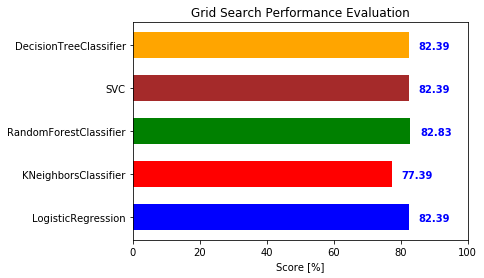

In [117]:
x = ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'SVC', 'DecisionTreeClassifier']
y = gridsearchscore

fig, ax = plt.subplots()    
width = 0.6 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color=["blue", "red", "green", "brown", "orange"])
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
plt.title('Grid Search Performance Evaluation')
plt.xlabel('Score [%]')
plt.xlim(0, 100)

for i, v in enumerate(y):
    ax.text(v+3, i-0.1, str(v), color='blue', fontweight='bold')

plt.show()

6.4 Summary

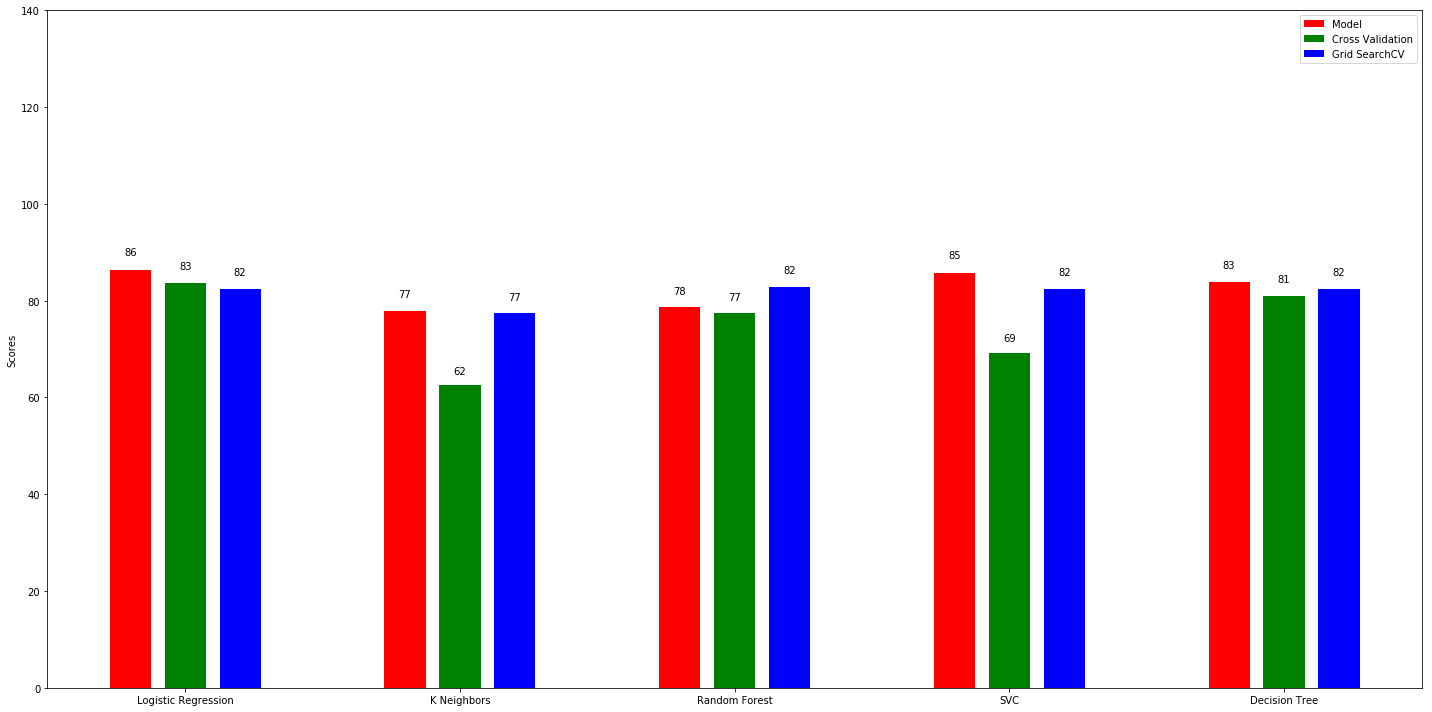

In [118]:
N = 5
ind = np.arange(N)  # the x locations for the groups .update
width = 0.2       # the width of the bars

#plt.rcParams.update({'font.size': 25})
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

yvals = score
rects1 = ax.bar(ind, yvals, width=0.15, color='r')
zvals = crossvalscore
rects2 = ax.bar(ind+width, zvals, width=0.15, color='g')
kvals = gridsearchscore
rects3 = ax.bar(ind+width*2, kvals, width=0.15, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Logistic Regression', 'K Neighbors', 'Random Forest', 'SVC', 'Decision Tree') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Model', 'Cross Validation', 'Grid SearchCV') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., h*1.03, '%d'%int(h), ha='center', va='bottom')

axes = plt.gca()
axes.set_ylim([0,140])

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()
plt.show()

